# The Sparks Foundation
# GRIP Sep 2021
# Name: Apurva Kadam
# TASK 1: Prediction using supervised ML
# Problem statement: Predict the percentage of a student based on the number of study hours.




In [61]:
# Importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn import linear_model




In [8]:
#Reading the dataset
data = pd.read_csv('http://bit.ly/w-data')
data.head(5)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [9]:
data.tail(5)

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [10]:
# check if there is any null value in the dataset
data.isnull == True

False

# So there is no null value in the dataset


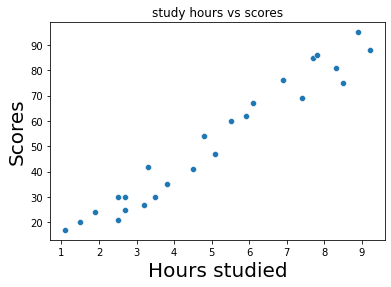

In [33]:
#vizualization of data
sns.scatterplot(y=data['Scores'], x=data['Hours'])#
plt.title('study hours vs scores')
plt.xlabel('Hours studied',fontsize=20)
plt.ylabel('Scores',fontsize=20)
plt.show()


# From above scatter plot we can see that there is a positive correlation between study hours and scores

# Training the model


In [74]:
#Splitting the data
x = data.iloc[:, :-1]
y = data.iloc[:, 1]

In [75]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,train_size=0.8,test_size=0.2,random_state=0)

In [76]:
from sklearn.linear_model import LinearRegression

In [77]:
#fitting data into model
regressor = LinearRegression()
regressor.fit(x_train, y_train)
print('Training complete')

Training complete


In [79]:
#plottong regression line
line = regressor.coef_*x+regressor.intercept_

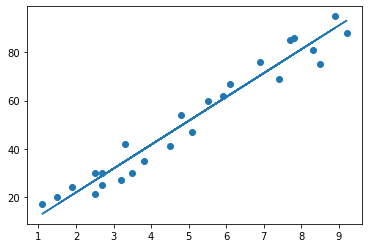

In [80]:
plt.scatter(x,y)
plt.plot(x, line);
plt.show()

# Making prediction

In [87]:
print(x_test)
y_pred = regressor.predict(x_test)

    Hours
5     1.5
2     3.2
19    7.4
16    2.5
11    5.9


In [81]:
#compairing actual vs predicted
prediction = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
prediction

,Actual,Predicted
5,20,16.884145
2,27,33.732261
19,69,75.357018
16,30,26.794801
11,62,60.491033


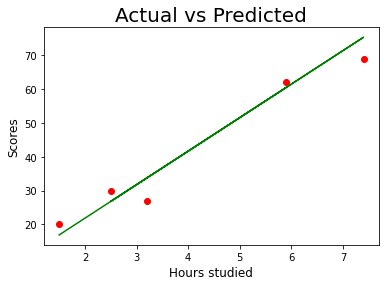

In [89]:
#visually compairing predicted marks with actual marks
plt.scatter(x=x_test, y=y_test, color='red')
plt.plot(x_test, y_pred, color='Green')
plt.title('Actual vs Predicted', size=20)
plt.ylabel('Scores', size=12)
plt.xlabel('Hours studied', size=12)
plt.show()

In [84]:
#predicted score if student studies for 9.25 hrs
hours = 9.25
own_pred = regressor.predict([[hours]])
print("No of Hours = {}".format(hours))
print("predicted score = {}".format(own_pred[0]))

No of Hours = 9.25
predicted score = 93.69173248737538


# According to regression model the predicted score if a student studies for 9.25 hrs/day is 93.69% 

In [86]:
from sklearn import metrics 
print('Mean absolute error:',metrics.mean_absolute_error(y_test, y_pred))

Mean absolute error: 4.183859899002975
